In [204]:
import pandas as pd
import csv
import json
pd.set_option('display.max_colwidth', None)

In [ ]:
f = json.load(open('/Users/nazneenrajani/workspace/model-card-analysis/control_models.json'))

In [657]:
#read elasticsearch json files and convert to csv weekly downloads
from collections import defaultdict
import csv

f = json.load(open('/Users/nazneenrajani/workspace/model-card-analysis/2022_model_usage.json'))
model_downloads = {}
for data in f['aggregations']['model']['buckets']:
    model  = data['key']
    weekly_downloads = defaultdict(int)
    for buckets in data['weekly_downloads']['buckets']:
        week = buckets['key_as_string']
        downloads = buckets['total_downloads']['value']
        weekly_downloads[week] = int(downloads)
    model_downloads[model] = weekly_downloads

header = ['Model'] 
for k in model_downloads['Jean-Baptiste/roberta-large-ner-english'].keys():
    header.append(k)
with open('2022_model_usage.csv', 'w', encoding='UTF8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header)
    for k,v in model_downloads.items():
        row = [k]
        for weeks in model_downloads['Jean-Baptiste/roberta-large-ner-english'].keys():
            row.append(v.get(weeks))
        writer.writerow(row)

    

In [30]:
#Recency based models
from datasets import load_dataset, Dataset
import huggingface_hub
from huggingface_hub import HfApi
from collections import defaultdict
import pandas as pd
import numpy as np
api = HfApi()

In [31]:
top_models = api.list_models(sort="lastModified",direction=-1)
recent_models = []
for i in range(10000):
    recent_models.append(top_models[i].modelId)

In [32]:
top_models = api.list_models(sort="downloads",direction=-1)
topdownloads_models = []
for i in range(1000):
    topdownloads_models.append(top_models[i].modelId)

In [33]:
recent_topdownload_models = list(set(recent_models) & set(topdownloads_models))

In [34]:
recent_topdownload_models

['deepparag/Aeona',
 'stanfordnlp/stanza-fr',
 'LTP/small',
 'UBC-NLP/MARBERT',
 'cmarkea/distilcamembert-base',
 'bigscience/bloom-350m',
 'distilbert-base-cased-distilled-squad',
 'Helsinki-NLP/opus-mt-ko-en',
 'Helsinki-NLP/opus-mt-cs-en',
 'carted-nlp/categorization-finetuned-20220721-164940-distilled-20220810-185342',
 'Helsinki-NLP/opus-mt-id-en',
 'Helsinki-NLP/opus-mt-nl-en',
 'Helsinki-NLP/opus-mt-en-nl',
 'EleutherAI/gpt-neo-125M',
 'ybelkada/t5-3b-sharded',
 'bigscience/bloom-7b1',
 'carted-nlp/categorization-finetuned-20220721-164940-distilled-20220811-132317',
 'deepset/xlm-roberta-base-squad2',
 'tner/bertweet-large-wnut2017',
 'Helsinki-NLP/opus-mt-et-en',
 'tals/albert-xlarge-vitaminc-mnli',
 'Helsinki-NLP/opus-mt-ar-en',
 'nghuyong/ernie-2.0-base-en',
 'HUPD/hupd-distilroberta-base',
 'deepset/deberta-v3-base-squad2',
 'Helsinki-NLP/opus-mt-uk-en',
 'Helsinki-NLP/opus-mt-fr-en',
 'Helsinki-NLP/opus-mt-pl-en',
 'deepset/minilm-uncased-squad2',
 'Helsinki-NLP/opus-mt-de-

In [35]:
for m in recent_topdownload_models:
    print('or from_pretrained : "' + m + '"')

or from_pretrained : "deepparag/Aeona"
or from_pretrained : "stanfordnlp/stanza-fr"
or from_pretrained : "LTP/small"
or from_pretrained : "UBC-NLP/MARBERT"
or from_pretrained : "cmarkea/distilcamembert-base"
or from_pretrained : "bigscience/bloom-350m"
or from_pretrained : "distilbert-base-cased-distilled-squad"
or from_pretrained : "Helsinki-NLP/opus-mt-ko-en"
or from_pretrained : "Helsinki-NLP/opus-mt-cs-en"
or from_pretrained : "carted-nlp/categorization-finetuned-20220721-164940-distilled-20220810-185342"
or from_pretrained : "Helsinki-NLP/opus-mt-id-en"
or from_pretrained : "Helsinki-NLP/opus-mt-nl-en"
or from_pretrained : "Helsinki-NLP/opus-mt-en-nl"
or from_pretrained : "EleutherAI/gpt-neo-125M"
or from_pretrained : "ybelkada/t5-3b-sharded"
or from_pretrained : "bigscience/bloom-7b1"
or from_pretrained : "carted-nlp/categorization-finetuned-20220721-164940-distilled-20220811-132317"
or from_pretrained : "deepset/xlm-roberta-base-squad2"
or from_pretrained : "tner/bertweet-large-

In [ ]:
from datetime import datetime
d=[]
for i in range(len(s)):
    d.append(datetime.strptime(s[i], '%b %d, %Y @ %H:%M:%S.%f'))

In [ ]:
new_df = df.drop('@timestamp', axis=1)

In [ ]:
new_df['time'] = d

In [ ]:
new_df[]

,count,from_pretrained,time
0,1,openai/clip-vit-large-patch14,2022-08-21
1,4,Jean-Baptiste/camembert-ner,2022-08-21
2,3,microsoft/DialoGPT-large,2022-08-21
3,3,openai/clip-vit-large-patch14,2022-08-21
4,4,openai/clip-vit-large-patch14,2022-08-21


In [ ]:
new_df['count'].groupby(by=[new_df['time'].dt.isocalendar().week]).sum()

week
33    350367
Name: count, dtype: int64

In [ ]:
df1 = new_df.resample('W', on='time')['count'].sum()

In [ ]:
new_df['time'] = new_df['time'].astype('datetime64[ns]')
out = new_df.resample('W-Sun', label='left', closed='left', on = 'time').sum()

In [ ]:
out

,count
time,
2022-08-14,350122
2022-08-21,245


In [ ]:
agg_df = new_df.groupby([new_df['time'].dt.isocalendar().week], as_index=False).agg({'count' : 'sum'})

In [70]:
import pickle

file = open('dataset_readme.pickle', 'rb')
datacards = pickle.load(file)
file = open('dataset_readme2.pickle', 'rb')
datacards2 = pickle.load(file)

In [71]:
data_list = list(datacards.values()) + list(datacards2.values())

## Recency based model analysis

In [674]:
import pickle

file = open('timetrack_analysis_all_30k.pkl', 'rb')
data = pickle.load(file)

In [675]:
import datetime
def str2time(str):
    time = datetime.datetime.strptime(str, "%a %b %d %H:%M:%S %Y %z").date()
    return time

In [676]:
data

,model_name,init_time,readme_time,init_readme_diff
0,YXHugging/autotrain-xlm-roberta-base-reviews-672119799,Sun Mar 27 00:52:19 2022 +0000,Mon Mar 28 01:30:54 2022 +0000,1 days 00:38:35
1,huggingtweets/dumb4funbp,Thu Apr 15 19:04:09 2021 +0000,Thu Apr 15 19:04:15 2021 +0000,0 days 00:00:06
2,Khanh/bert-base-multilingual-cased-finetuned-squad,Tue Jan 4 13:17:01 2022 +0000,Tue Jan 4 14:51:33 2022 +0000,0 days 01:34:32
3,FollishBoi/ppo-LunarLander-v2_try2,Mon May 9 12:11:20 2022 +0000,Mon May 9 12:11:55 2022 +0000,0 days 00:00:35
4,Crives/distilbert-base-uncased-finetuned-emotion,Wed Feb 9 21:48:33 2022 +0000,Wed Feb 9 22:08:11 2022 +0000,0 days 00:19:38
...,...,...,...,...
30692,jonatasgrosman/exp_w2v2t_pl_wavlm_s515,Sun Jul 10 19:25:15 2022 +0000,Sun Jul 10 16:25:40 2022 -0300,0 days 00:00:25
30693,nlpconnect/vit-gpt2-image-captioning,Tue Jan 4 06:08:41 2022 +0000,Tue Jan 4 08:25:29 2022 +0000,0 days 02:16:48
30694,jimregan/wav2vec2-large-xlsr-latvian-cv,Sat Mar 20 19:22:12 2021 +0000,Sat Mar 20 19:40:46 2021 +0000,0 days 00:18:34
30695,RossM/distilgpt2-finetuned-MTG,Fri Jun 24 21:06:59 2022 +0000,Fri Jun 24 21:27:51 2022 +0000,0 days 00:20:52


In [647]:
data['init_time'] = data['init_time'].apply(str2time)

In [648]:
data = data.sort_values(by=['init_time'], ascending=True)

In [649]:
data['model_name'][500:1000].to_csv('top_500_recentmodels.csv')

In [650]:
data[11666:].to_csv('2022_models.csv') #2879 is <2021, 2879:11666 is 2021, 11666: is >2021

In [651]:
recent_models = data['model_name'][11666:].to_list()

In [652]:
top_models = api.list_models(sort="downloads",direction=-1)
topdownloads_models = []
for i in range(2000): #2000 for all years
    topdownloads_models.append(top_models[i].modelId)

In [677]:
top_models[2000]

ModelInfo: {
	modelId: xlm-mlm-tlm-xnli15-1024
	sha: None
	lastModified: None
	tags: []
	pipeline_tag: fill-mask
	siblings: None
	config: None
	id: xlm-mlm-tlm-xnli15-1024
	private: False
}

In [469]:
data.iloc[20000]

model_name                       simjo/model1_test
init_time                               2021-11-29
readme_time         Mon Nov 29 21:46:36 2021 +0000
init_readme_diff                   0 days 01:30:42
Name: 6370, dtype: object

In [653]:
recent_topdownload_models = list(set(recent_models) & set(topdownloads_models))

In [654]:
recent_topdownload_models

['EleutherAI/enformer-official-rough',
 'deepparag/Aeona',
 'microsoft/unixcoder-base-nine',
 'b3ck1/gpt-neo-125M-finetuned-beer-recipes',
 'DLochmelis33/22s-dl-sentiment-1',
 'yangheng/deberta-v3-base-absa-v1.1',
 'nlpconnect/vit-gpt2-image-captioning',
 'NHStudios/DialoGPT-small-jake',
 'hf-internal-testing/tiny-random-beit-pipeline',
 'DB13067/Peterbot',
 'JulesBelveze/t5-small-headline-generator',
 'philschmid/distilbert-onnx',
 'optimum/sbert-all-MiniLM-L6-with-pooler',
 'microsoft/layoutlmv3-base-chinese',
 'HomerChatbot/DialoGPT-small-homersimpsonbot',
 'yhavinga/t5-v1.1-large-dutch-cnn-test',
 'microsoft/swin-large-patch4-window7-224',
 'dlicari/Italian-Legal-BERT',
 'madhurjindal/autonlp-Gibberish-Detector-492513457',
 'KB/bert-base-swedish-cased',
 'facebook/vit-mae-base',
 'StanfordAIMI/stanford-deidentifier-only-radiology-reports',
 'staka/fugumt-en-ja',
 'fxmarty/resnet-tiny-beans',
 'RajSang/pegasus-sports-titles',
 'aliosm/sha3bor-footer-51-arabertv02-base',
 'Intel/dist

## Topic modeling on dataset cards

In [104]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nazneenrajani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
import markdown # pip install markdown
from bs4 import BeautifulSoup # pip install beautifulsoup4

def md_to_text(md):
    html = markdown.markdown(md)
    soup = BeautifulSoup(html, features='html.parser')
    return soup.get_text()


In [67]:
import re
def get_topics(text_list, num_topics=3):
    md_removed = []
    for txt in text_list:
        md_removed.append(re.sub('[,\.!?\n]', '', md_to_text(txt)).lower())
    words = list(sent_to_words(md_removed))
    words = remove_stopwords(words)
    id2word = corpora.Dictionary(words)
    corpus = [id2word.doc2bow(text) for text in words]
    lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)
    return lda_model

In [78]:
#average length of dataset
def averageLen(lst):
    lengths = [len(i.split()) for i in lst]
    return 0 if len(lengths) == 0 else (float(sum(lengths)) / len(lengths)) 

In [74]:
stop_words.extend(['data','dataset','using','information', 'needed', 'https', 'id','string', 'datasets', 'text','used','needs'])
topics = get_topics(data_list)

[(0, '0.012*"model" + 0.011*"task" + 0.007*"language" + 0.007*"autotrain" + 0.007*"unpredictable" + 0.006*"tasks" + 0.005*"contains" + 0.005*"card" + 0.005*"cluster" + 0.004*"source"'), (1, '0.005*"tasks" + 0.005*"train" + 0.005*"language" + 0.005*"test" + 0.004*"license" + 0.004*"impact" + 0.004*"known" + 0.004*"sensitive" + 0.003*"structuredata" + 0.003*"document"'), (2, '0.008*"train" + 0.007*"language" + 0.006*"test" + 0.005*"datasocial" + 0.005*"known" + 0.005*"source" + 0.005*"impact" + 0.005*"sensitive" + 0.005*"tasks" + 0.003*"validation"'), (3, '0.013*"train" + 0.007*"test" + 0.006*"huggingartists" + 0.006*"validation" + 0.005*"language" + 0.005*"sensitive" + 0.004*"list" + 0.004*"tasks" + 0.004*"example" + 0.004*"impact"'), (4, '0.010*"train" + 0.008*"language" + 0.006*"test" + 0.005*"example" + 0.005*"tasks" + 0.005*"known" + 0.005*"impact" + 0.004*"structuredata" + 0.004*"sensitive" + 0.004*"license"'), (5, '0.007*"language" + 0.006*"tasks" + 0.005*"source" + 0.005*"structu

## Analyzing CO2 section in model cards

In [658]:
df = pd.read_pickle('model_with_co2_df.pkl')

In [189]:
df.iloc[496].co2_section_content

'Problem type: SummarizationModel ID: 791824379CO2 Emissions (in grams): 736.9366247330848'

In [190]:
df.loc[df['co2_section_content'].str.len()>=100]

,model,co2_section_title,co2_section_content
0,distilroberta-base,Environmental Impact,Carbon emissions can be estimated using the Ma...
1,distilgpt2,Environmental Impact,Carbon emissions were estimated using the Mach...
2,t5-base,Environmental Impact,Carbon emissions can be estimated using the Ma...
3,t5-small,Environmental Impact,Carbon emissions can be estimated using the Ma...
4,xlm-roberta-large-finetuned-conll03-english,Environmental Impact,Carbon emissions can be estimated using the Ma...
...,...,...,...
509,nateraw/yolov6t,Environmental Impact,<!-- Total emissions (in grams of CO2eq) and a...
510,nateraw/hf-hub-modelcards-pr-test,Environmental Impact,<!-- Total emissions (in grams of CO2eq) and a...
511,bigscience/bloom-optimizer-states,Environmental Impact,"The training supercomputer, Jean Zay (website)..."
512,CompVis/stable-diffusion,Environmental Impact,Stable Diffusion v1 Estimated Emissions\nBased...


In [662]:
duplicate = df[df.duplicated('co2_section_content')]

In [233]:
co2_content = pd.DataFrame(df.groupby(['model','co2_section_content']).size().reset_index(name='count'))

In [234]:
co2_content

,model,co2_section_content,count
0,404E/autotrain-formality-1026434913,Problem type: Single Column RegressionModel ID: 1026434913CO2 Emissions (in grams): 7.300283563922049,1
1,AI-Lab-Makerere/en_lg,Problem type: Machine TranslationModel ID: 474612462CO2 Emissions (in grams): 133.0219882109991,1
2,AI-Lab-Makerere/lg_en,Problem type: Machine TranslationModel ID: 475112539CO2 Emissions (in grams): 126.34446293851818,1
3,AI-Prize-Challenges/autotrain-finetuned1-1035435583,Problem type: Binary ClassificationModel ID: 1035435583CO2 Emissions (in grams): 0.03608660562919794,1
4,Aimendo/autonlp-triage-35248482,Problem type: Multi-class ClassificationModel ID: 35248482CO2 Emissions (in grams): 7.989144645413398,1
...,...,...,...
509,zhifei/autotrain-chineses-title-summarization-3-1087939403,Problem type: SummarizationModel ID: 1087939403CO2 Emissions (in grams): 0.004900087842646563,1
510,ziedhajyahia/autotrain-ok-848227025,Problem type: Multi-class ClassificationModel ID: 848227025CO2 Emissions (in grams): 5.096755166899446,1
511,zwang199/autonlp-traffic-nlp-451311592,Problem type: Binary ClassificationModel ID: 451311592CO2 Emissions (in grams): 1.8697144296865242,1
512,zwang199/autonlp-traffic_nlp_binary-537215209,Problem type: Binary ClassificationModel ID: 537215209CO2 Emissions (in grams): 1.171798205242445,1


In [663]:
co2_content = pd.DataFrame(df['co2_section_content'].unique(), columns=['content'])

In [660]:
def get_cluster_topic(cluster, num_topics=10):
    cluster['content_processed'] = cluster['co2_section_content'].map(lambda x: re.sub('[,\.!?]', '', x))
    cluster['content_processed'] = cluster['content_processed'].map(lambda x: x.lower())
    data = cluster.content_processed.values.tolist()
    words = list(sent_to_words(data))
    words = remove_stopwords(data)
    id2word = corpora.Dictionary(words)
    corpus = [id2word.doc2bow(text) for text in words]
    lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)
    return lda_model

In [668]:
co2_content['content_processed'] = co2_content['content'].map(lambda x: re.sub('[,\.!?]', '', x))
co2_content['content_processed'] = co2_content['content_processed'].map(lambda x: x.lower())

In [669]:
data = co2_content.content_processed.values.tolist()
words = list(sent_to_words(data))
words = remove_stopwords(data)
id2word = corpora.Dictionary(words)
corpus = [id2word.doc2bow(text) for text in words]

In [670]:
words

[['estimated',
  'using',
  'machine',
  'learning',
  'impact',
  'calculator',
  'presented',
  'lacoste',
  'et',
  'al',
  'hardware',
  'type',
  'information',
  'neededhours',
  'used',
  'information',
  'neededcloud',
  'provider',
  'information',
  'neededcompute',
  'region',
  'information',
  'neededcarbon',
  'emitted',
  'information',
  'needed'],
 ['estimated',
  'using',
  'machine',
  'learning',
  'impact',
  'calculator',
  'presented',
  'lacoste',
  'et',
  'al',
  'hardware',
  'runtime',
  'cloud',
  'provider',
  'compute',
  'region',
  'utilized',
  'estimate',
  'impacthardware',
  'type',
  'gb',
  'hours',
  'used',
  'week',
  'cloud',
  'provider',
  'azurecompute',
  'region',
  'unavailable',
  'east',
  'us',
  'emitted',
  'power',
  'consumption',
  'time',
  'produced',
  'based',
  'location',
  'power',
  'grid',
  'kg',
  'eq'],
 ['estimated',
  'using',
  'machine',
  'learning',
  'impact',
  'calculator',
  'presented',
  'lacoste',
  'et',

In [672]:
co2_content.loc[co2_content['content'].str.contains('mousserande')]

,content,content_processed
212,"Here is how to use this model to summarize legal text written in Swedish in PyTorch:from transformers import AutoTokenizer, AutoModelWithLMHead, TranslationPipeline\n\npipeline = TranslationPipeline(\nmodel=AutoModelWithLMHead.from_pretrained(""SEBIS/legal_t5_small_summ_sv""),\ntokenizer=AutoTokenizer.from_pretrained(pretrained_model_name_or_path = ""SEBIS/legal_t5_small_summ_sv"", do_lower_case=False, \n skip_special_tokens=True),\n device=0\n)\n\nsv_text = ""EUROPEISKA GEMENSKAPERNAS RÅD HAR ANTAGIT DENNA FÖRORDNING med beaktande av Fördraget om upprättandet av Europeiska ekonomiska gemenskapen, särskilt artiklarna 43 och 100a i detta, med beaktande av kommissionens förslag(1), i samarbete med Europaparlamentet(2), med beaktande av Ekonomiska och sociala kommitténs yttrande(3), och med beaktande av följande: Det bör införas förbud mot användning av blybaserade kapsyler eller blybaserad folie i förslutningar på förpackningar som används då aromatiserade viner, aromatiserade vinbaserade drycker och aromatiserade drinkar baserade på vinprodukter släpps ut på marknaden i syfte att undvika risken för kontaminering, särskilt vid oavsiktlig kontakt med sådana produkter, samt risken för miljöförorening på grund av avfall som innehåller bly från kapsyler och folie av detta slag. Tillverkarna och användarna av kapsylerna och folien i fråga bör dock ges tid att anpassa sig genom att förbudet inte tillämpas förrän från och med den 1 januari 1993. Det är även nödvändigt att tillåta att produkter som före detta datum tappats på buteljer med blybaserade kapsyler eller blybaserad folie får säljas till dess att lagren är uttömda. Vissa definitioner av aromatiserade vinbaserade drycker bör anpassas så att större hänsyn tas till traditionella framställningsmetoder. Förordning (EEG) nr 1601/91(4) bör därför ändras. HÄRIGENOM FÖRESKRIVS FÖLJANDE. Artikel 1 Förordning (EEG) nr 1601/91 ändras på följande sätt: 1. Artikel 2.3 a första stycket skall ersättas med följande: %quot%a) Sangria: en dryck som framställs av vin - som smaksatts genom tillsats av naturliga extrakt eller essenser av citrusfrukt, - med eller utan saft av sådan frukt, - eventuellt: - med tillsats av kryddor, - sötat, - med tillsats av CO2, och med en slutlig alkoholstyrka på under 12 volymprocent.%quot% 2. Artikel 2.3 e skall ersättas med följande: %quot%e) Kalte Ente: Smaksatt vinbaserad dryck som framställs genom att vin, pärlande vin eller pärlande vin med tillsatt CO2 blandas med mousserande vin eller mousserande vin med tillsatt CO2 och tillsätts naturlig citronsubstans eller extrakt av detta som måste ge en tydligt framträdande smak. Slutprodukten måste innehålla minst 25 volymprocent mousserande vin eller mousserande vin med tillsatt CO2.%quot% 3. Följande punkt skall införas i artikel 8: %quot%4.a Från och med den 1 januari 1993 får buteljerade produkter som omfattas av denna förordning inte saluhållas eller släppas ut på marknaden i förpackningar med förslutningar som täckts med blybaserade kapsyler eller blybaserad folie. Dock får produkter som före detta datum tappats på flaskor med detta slag av kapsyler eller folie avyttras till dess att lagren tömts.%quot% Artikel 2 Denna förordning träder i kraft den tredje dagen efter det att den har offentliggjorts i Europeiska gemenskapernas officiella tidning. Denna förordning är till alla delar bindande och direkt tillämplig i alla medlemsstater. Utfärdad i Bryssel den 9 november 1992. På rådets vägnar D. HURD Ordförande (1) EGT nr C 69, 18.3.1992, s. 11. (2) EGT nr C 241, 21.9.1992, s. 97 och beslut av den 28 oktober 1992. (3) EGT nr C 169, 6.7.1992, s. 1. (4) EGT nr L 149, 14.6.1991, s. 1. ""\n\npipeline([sv_text], max_length=512)\n","here is how to use this model to summarize legal text written in swedish in pytorch:from transformers import autotokenizer automodelwithlmhead translationpipeline\n\npipeline = translationpipeline(\nmodel=automodelwithlmheadfrom_pretrained(""sebis/legal_t5_small

In [666]:
lda = get_cluster_topic(df)

In [245]:
stop_words.extend(['carbon', 'emissions', 'co', 'assumed'])

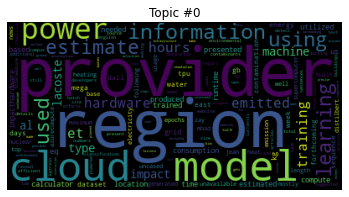

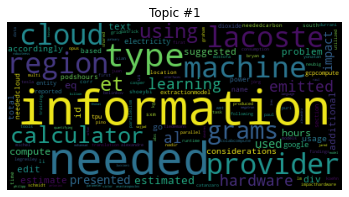

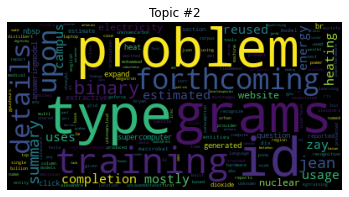

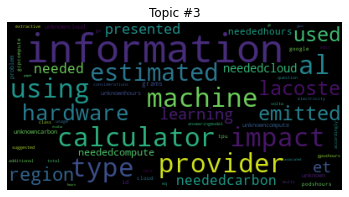

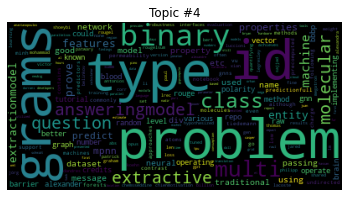

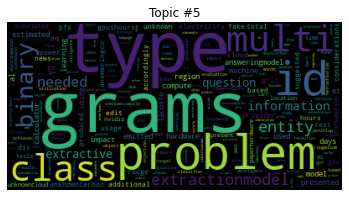

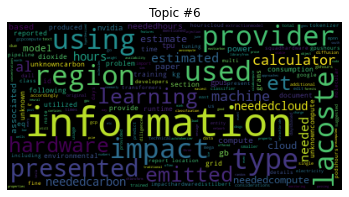

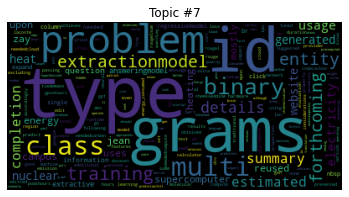

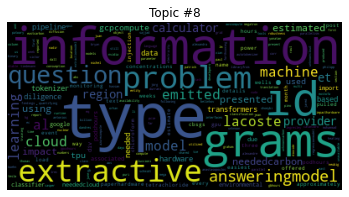

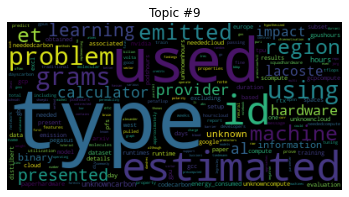

In [273]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for t in range(lda.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

## Plotting

In [783]:
pd.options.plotting.backend = "plotly"

In [553]:
df = pd.read_csv('/Users/nazneenrajani/workspace/model-card-analysis/recent_models_init_time3.csv') #year 2022
df_2021 = pd.read_csv('/Users/nazneenrajani/workspace/model-card-analysis/recent_models_init_time4.csv') #year 2021

In [554]:
df.fillna(0, inplace=True)
df_2021.fillna(0, inplace=True)

In [555]:
df_transposed = df.set_index('Model').T
df_transposed_2021 = df_2021.set_index('Model').T

In [556]:
df_plot = df_transposed_2021

In [562]:
from datetime import datetime
time = df_plot.index.to_list()
time_range = []
for t in time:
    time_range.append(str(datetime.strptime(t, '%Y-%m-%dT%H:%M:%S.%fZ').date().month) +'/' +  str(datetime.strptime(t, '%Y-%m-%dT%H:%M:%S.%fZ').date().day) + '/' + str(datetime.strptime(t, '%Y-%m-%dT%H:%M:%S.%fZ').date().year)[-2:])

In [566]:
df_plot.index = time_range

In [433]:
df_popular_mod = df_plot[df_plot.columns[(df_plot.mean(axis=0)<=1500) & (df_plot.mean(axis=0)>=500)]]

In [435]:
df_popular_low =  df_plot[df_plot.columns[df_plot.mean(axis=0)<500]]

In [437]:
df_popular_low1 = df_popular_low[df_popular_low.columns[df_popular_low.mean(axis=0)>275]]

In [583]:
df_stats = df_plot.describe()
quantile_value = df_stats.quantile(0.99, axis=1)['mean']

In [584]:
df_plot.loc[:,[(df_plot[col].mean() > quantile_value) for col in df_plot.columns]]

Model,sentence-transformers/all-MiniLM-L6-v2,sentence-transformers/all-mpnet-base-v2,sentence-transformers/multi-qa-MiniLM-L6-cos-v1
8/30/21,125.0,281.0,63.0
9/6/21,583.0,1053.0,116.0
9/13/21,2005.0,1403.0,328.0
9/20/21,20276.0,3104.0,213.0
9/27/21,16822.0,11994.0,951.0
10/4/21,24066.0,37892.0,1738.0
10/11/21,138684.0,28697.0,878.0
10/18/21,52581.0,18064.0,6195.0
10/25/21,618613.0,36636.0,4730.0
11/1/21,1528165.0,67053.0,1363.0


In [580]:
df_plot_data

Model,sentence-transformers/all-MiniLM-L6-v2,sentence-transformers/all-mpnet-base-v2,sentence-transformers/all-MiniLM-L12-v2,EleutherAI/gpt-j-6B,sentence-transformers/multi-qa-MiniLM-L6-cos-v1,sentence-transformers/all-distilroberta-v1,yiyanghkust/finbert-tone,microsoft/deberta-v3-large,sentence-transformers/multi-qa-mpnet-base-dot-v1,microsoft/deberta-v3-base,...,dbmdz/convbert-base-turkish-mc4-cased,JonatanGk/roberta-base-bne-finetuned-cyberbullying-spanish,Geotrend/distilbert-base-es-cased,nvidia/segformer-b0-finetuned-cityscapes-768-768,raynardj/ner-gene-dna-rna-jnlpba-pubmed,bespin-global/klue-bert-base-mrc,gayanin/t5-small-mlm-pubmed,patrickvonplaten/distilhubert-timit,superb/wav2vec2-large-superb-ic,SkolkovoInstitute/bart-base-detox
8/30/21,125.0,281.0,176.0,2269.0,63.0,63.0,541.0,0.0,67.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9/6/21,583.0,1053.0,208.0,2410.0,116.0,163.0,569.0,0.0,107.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0
9/13/21,2005.0,1403.0,373.0,1848.0,328.0,320.0,574.0,0.0,113.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0
9/20/21,20276.0,3104.0,305.0,2590.0,213.0,312.0,919.0,0.0,129.0,0.0,...,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9/27/21,16822.0,11994.0,971.0,6116.0,951.0,460.0,498.0,0.0,304.0,0.0,...,15.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
10/4/21,24066.0,37892.0,1271.0,3075.0,1738.0,3836.0,1777.0,0.0,1495.0,0.0,...,13.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0
10/11/21,138684.0,28697.0,5713.0,3046.0,878.0,1890.0,7249.0,0.0,1895.0,0.0,...,4.0,24.0,13.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0
10/18/21,52581.0,18064.0,8676.0,5233.0,6195.0,1971.0,974.0,273.0,646.0,88.0,...,5.0,11.0,14.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0
10/25/21,618613.0,36636.0,9078.0,6147.0,4730.0,1076.0,8917.0,4837.0,888.0,64.0,...,22.0,7.0,7.0,0.0,0.0,9.0,0.0,8.0,4.0,0.0
11/1/21,1528165.0,67053.0,5721.0,7781.0,1363.0,1094.0,16031.0,2219.0,420.0,182.0,...,12.0,18.0,5.0,0.0,10.0,11.0,0.0,0.0,1.0,0.0


In [543]:
tmp = df_stats.loc[:,df_stats.loc['mean']>df_stats.quantile(0.99, axis=1)['mean']]

In [496]:
import plotly.express as px
df_stats = df_2021_popular_mod.describe()
fig = px.histogram(df_stats.iloc[1], nbins=10)
fig.show()

In [438]:
df_popular_low1.plot(kind='line', width=1400, height=600) #models that have mean downloads > 275 but < 500

In [434]:
df_popular_mod.plot(kind='line', width=1400, height=600) #models that have mean downloads >= 500 but <= 1500

In [430]:
df_popular.plot(kind='line', width=1400, height=600) #models that have mean downloads > 1500

In [396]:
df_plot.plot(kind='line', width=1400, height=600)

In [490]:
df_2201_popular = df_plot[df_plot.columns[(df_plot.mean(axis=0)>=40000)]]
df_2201_popular.plot(kind='line', width=1400, height=600)

In [497]:
df_2021_popular_mod = df_plot[df_plot.columns[(df_plot.mean(axis=0)<=40000) & (df_plot.mean(axis=0)>=5000)]]
df_2021_popular_mod.plot(kind='line', width=1400, height=600)

In [501]:
df_2021_popular_low = df_plot[df_plot.columns[(df_plot.mean(axis=0)<=5000) & (df_plot.mean(axis=0)>=3000)]]
df_2021_popular_low.plot(kind='line', width=1400, height=600)

In [577]:
df_plot_data.plot(kind='line', width=1400, height=600)

/Users/nazneenrajani/miniconda3/envs/autoeval/lib/python3.9/site-packages/plotly/express/_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/nazneenrajani/miniconda3/envs/autoeval/lib/python3.9/site-packages/plotly/express/_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/Users/nazneenrajani/miniconda3/envs/autoeval/lib/python3.9/site-packages/plotly/express/_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

## Model card author

In [753]:
author = pd.read_pickle('/Users/nazneenrajani/workspace/model-card-analysis/authorship_model.pkl')
model_authors = pd.read_pickle('/Users/nazneenrajani/workspace/model-card-analysis/model_author.pkl')

In [827]:
top_authors = author.iloc[:100,1:3]
fig = px.bar(top_authors, x='author', y='model_num', color='author', height=600, labels={'author':'Contributor', 'model_num':'Total number of Models'}, title='Top 100 contributors to model documentation')
fig.show()

In [771]:
model_authors['len'] = model_authors['modelcard_author'].map(lambda x: len(x))

In [828]:
model_contrib[:20]

,model_name,modelcard_author,len
30012,bigscience/bloom,"[Teven Le Scao, Margaret Mitchell, meg, Marissa, Muennighoff, Stas Bekman, yjernite, Younes Belkada, Thomas Wang, ybelkada, Christopher Akiki, Niklas Muennighoff, cakiki, TimeRobber]",14
5803,deepset/roberta-base-squad2,"[Julien Chaumond, Celik, Malte Pietsch, Michel Bartels, Julian Risch, Branden Chan, Tuana Celik, TuanaCelik, Tuana]",9
20547,bigscience/bloom-7b1,"[Teven Le Scao, Margaret Mitchell, Muennighoff, Younes Belkada, ybelkada, Christopher Akiki, Niklas Muennighoff]",7
31724,projecte-aina/roberta-base-ca-v2,"[Blanca Calvo Figueras, Montserrat Marimon, Marc Pàmies, Carlos Rodríguez, Carme Armentano, Asier Gutiérrez-Fandiño, Aitor Gonzalez-Agirre]",7
3862,facebook/s2t-small-librispeech-asr,"[Anton Lozhkov, Suraj Patil, Niels Rogge, elishowk, Mishig Davaadorj, Patrick von Platen, patil-suraj]",7
9585,model-attribution-challenge/bloom-2b5,"[Teven Le Scao, Margaret Mitchell, Muennighoff, Younes Belkada, ybelkada, Christopher Akiki, Niklas Muennighoff]",7
3394,nvidia/stt_en_conformer_ctc_large,"[Anton Lozhkov, Ryan Leary, Oleksii Kuchaiev, Somshubra Majumdar, okuchaiev, Patrick von Platen, Eric Harper]",7
10934,bigscience/bloom-3b,"[Teven Le Scao, Margaret Mitchell, Muennighoff, Younes Belkada, ybelkada, Christopher Akiki, Niklas Muennighoff]",7
1191,bigscience/bloom-1b7,"[Margaret Mitchell, meg, Younes Belkada, ybelkada, Christopher Akiki, Niklas Muennighoff]",6
23006,deepset/electra-base-squad2,"[Julien Chaumond, sjrlee, Sebastian, Julian Risch, Branden Chan, Tuana Celik]",6


In [819]:
model_contrib = model_authors.sort_values(by='len', ascending=False)
model_contrib_plot = model_contrib.loc[model_contrib['len']>0].groupby('len').count().reset_index()

,len,model_name,modelcard_author
0,1,30289,30289
1,2,4316,4316
2,3,481,481
3,4,163,163
4,5,46,46
5,6,13,13
6,7,6,6
7,9,1,1
8,14,1,1


In [825]:
fig = px.line(model_contrib_plot, y='model_name', x='len', height=600, labels={'len':'Total number of contributors', 'model_name':'Total number of models'}, title = "Number of contributors per model card")
fig.show()

In [764]:
model_authors.reindex(model_authors['modelcard_author'].str.len().sort_values(ascending=False).index)[:30]

,model_name,modelcard_author
30012,bigscience/bloom,"[Teven Le Scao, Margaret Mitchell, meg, Marissa, Muennighoff, Stas Bekman, yjernite, Younes Belkada, Thomas Wang, ybelkada, Christopher Akiki, Niklas Muennighoff, cakiki, TimeRobber]"
5803,deepset/roberta-base-squad2,"[Julien Chaumond, Celik, Malte Pietsch, Michel Bartels, Julian Risch, Branden Chan, Tuana Celik, TuanaCelik, Tuana]"
20547,bigscience/bloom-7b1,"[Teven Le Scao, Margaret Mitchell, Muennighoff, Younes Belkada, ybelkada, Christopher Akiki, Niklas Muennighoff]"
31724,projecte-aina/roberta-base-ca-v2,"[Blanca Calvo Figueras, Montserrat Marimon, Marc Pàmies, Carlos Rodríguez, Carme Armentano, Asier Gutiérrez-Fandiño, Aitor Gonzalez-Agirre]"
3862,facebook/s2t-small-librispeech-asr,"[Anton Lozhkov, Suraj Patil, Niels Rogge, elishowk, Mishig Davaadorj, Patrick von Platen, patil-suraj]"
9585,model-attribution-challenge/bloom-2b5,"[Teven Le Scao, Margaret Mitchell, Muennighoff, Younes Belkada, ybelkada, Christopher Akiki, Niklas Muennighoff]"
3394,nvidia/stt_en_conformer_ctc_large,"[Anton Lozhkov, Ryan Leary, Oleksii Kuchaiev, Somshubra Majumdar, okuchaiev, Patrick von Platen, Eric Harper]"
10934,bigscience/bloom-3b,"[Teven Le Scao, Margaret Mitchell, Muennighoff, Younes Belkada, ybelkada, Christopher Akiki, Niklas Muennighoff]"
1191,bigscience/bloom-1b7,"[Margaret Mitchell, meg, Younes Belkada, ybelkada, Christopher Akiki, Niklas Muennighoff]"
23006,deepset/electra-base-squad2,"[Julien Chaumond, sjrlee, Sebastian, Julian Risch, Branden Chan, Tuana Celik]"


In [759]:
model_authors.groupby(model_authors['modelcard_author'].map(tuple)).count().sort_values(by='model_name', ascending=False)

,model_name,modelcard_author
modelcard_author,,
"(huggingtweets,)",2752,2752
"(Jonatas Grosman,)",1118,1118
"(system,)",1099,1099
"(Julien Chaumond, system)",978,978
"(Julien Chaumond,)",489,489
...,...,...
"(Kushal Joseph,)",1,1
"(Kushagra Tewari,)",1,1
"(Kurtis M Gonzalez,)",1,1
